In [105]:
#importing relevant packages
import bitarray
import random
import math

#a hash function that return the index from 0 to m, with the 
#input of the m, the element to hash and the order of the
#hash function(number)
def hashit(length,element,number):
    #calculating a unique number for each string element
    val=0
    for chr in element:
        val += ord(chr)  
    #setting seed for this unique value so querying can be performed
    random.seed(val)    
    #calculating a number unique to the element and the order of the hash function
    ans=random.randint(1,val)*number   
    return(ans % length) 


#defining the Bloom Filter class 
class Bloom(object): 
    def __init__(self,m,k): 
        self.b_array=bitarray.bitarray(m)   #creating the bits array
        self.len=m    #initialize the length of the bits array
        self.hashfun=k   #initialize the number of hash function to use
        self.b_array.setall(0)   #setting all the bits to 0s 
        
    def add(self,element): 
        #setting all indices the k hash functions return to 1s
        for _ in range(self.hashfun):   
            index=hashit(self.len,element,_)
            self.b_array[index]=1
        
    def query(self,element): 
        #checking for at least 1 zero in the indices the k 
        #hash function hashed to. If there's 1 zero, the element is not in the
        #Filter. If there's no zero, the element might be in the Filter
        for _ in range(self.hashfun):   
            index=hashit(self.len,element,_)              
            if self.b_array[index]==0:  
                return("Element was not added in the Filter")
        return("Element was probably added to the Filter")
    

    
#a function to calculate the optimal k for a given 
#false positive rate Pr
def op_k(Pr):
    k=-math.log(Pr,2)
    return(int(k))

#a function to calculate the optimal m for a given 
#false positive rate Pr and number of expected element n
def op_m(Pr,n): 
    m=-n*math.log(Pr,2)/math.log(2)
    return(int(m))

#testing the Bloom Filter
bloom=Bloom(op_m(0.01,1000),op_k(0.01))
bloom.add("Ash")
bloom.query("Stern")
bloom.query("Ash")

'Element was probably added to the Filter'

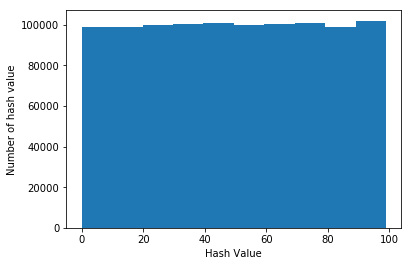

In [136]:
import matplotlib.pyplot as plt
import string

def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

randomwords=[]
for i in range(100000): 
    randomwords.append(randomword(10))

a=[]    
for _ in randomwords:
    for i in range(10):
        a.append(mmh3.hash(_,10)%100)
    
    

plt.hist(a)
plt.xlabel("Hash Value")
plt.ylabel("Number of hash value")
plt.show()

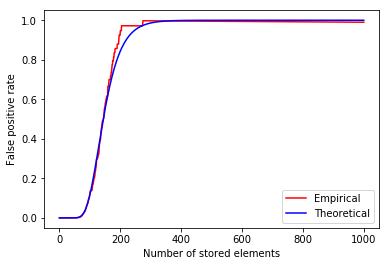

In [3]:
import mmh3
import matplotlib.pyplot as plt
import string
import math
import random
import bitarray

def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

randomwords=[]
for i in range(100000): 
    randomwords.append(randomword(10))

class Bloom(object): 
    def __init__(self,m,k): 
        self.b_array=bitarray.bitarray(m)  
        self.len=m    
        self.hashfun=k   
        self.b_array.setall(0)  
        
    def add(self,element): 
        for _ in range(self.hashfun):   
            index=mmh3.hash(element,_) % self.len
            self.b_array[index]=1
        
    def query(self,element): 
        for _ in range(self.hashfun):   
            index=mmh3.hash(element,_) % self.len             
            if self.b_array[index]==0:  
                return(False)
        return(True)
    


def get_fp_rate(n):
    bloom=Bloom(1000,25)
    count=0
    
    for _ in randomwords[0:n]:
        bloom.add(_)   
    for _ in range(len(randomwords)):
        check1=bloom.query(randomwords[_])
        if check1==True and _>=n: 
            count+=1
    return(float(count)/100000)
    
a=[]
x=[_ for _ in range(1000)]
y=[(1-math.exp(-(_*25)/1000))**25 for _ in x]

for _ in range(1000): 
    a.append(get_fp_rate(_))

ash1, =plt.plot(x,a,"red")
ash2, =plt.plot(x,y,"blue")
plt.ylabel('False positive rate')
plt.xlabel('Number of stored elements')
plt.legend([ash1, ash2], ['Empirical', 'Theoretical'])
plt.show()
